# Compute and plot an ocean temperature profile using the lotus queue

To successfully work through this tutorial you will need to make use of box_profile.py and submit_box_profile_lotus.slurm

Before running this python notebook you will need to setup the slurm file to compute your profile.
For this example we will compute a temperature profile of the Atlantic Multidecadal Variability
Please change my jasmin userid, jmecking001, to your userid
1)  Open the submit_box_profile_lotus.slurm and set the specifics for your profile. We will use the short serial 4 hour queue, which is good for computations computations that aren't too memory intensive and are relatively short, there are several other queues available on JASMIN which you can read about on the website. 
2)  Open a terminal on JASMIN, this will require you to ssh into one of the sci compute servers inorder to be able to submit to the lotus queue
3)  From the terminal submit your job to the lotus queue:  >sbatch submit_box_profile_lotus.slurm
4)  To check on the computation >squeue -u jmecking001
5)  It will take a 30 minutes to 1 hour to compute, note that the larger the box the longer it will take to compute.
6)  Once all the computations on the lotus queue have completed you can move on to making the plots below.

There will be individual netcdf files generated for each ensemble member containing the temperature profile.
You will have a bunch of .out and .err files, one for each ensemble member, if the computation wasn't successful this is where you can start looking to understand what went wrong.

In [1]:
# Load python packages used to make calculations:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import glob

In [2]:
# Read in profile data that was computed:
datadir = '/gws/nopw/j04/canari/users/jmecking001/profiles/'
pfiles  = glob.glob(datadir + '*amv*.nc') # List all profile files
nf      = len(pfiles)

# Uncomment to print out list of files:
#print(pfiles)

# Read in and create time invarient variables:
# You can make use of the time variable in the netcdf file, but for simplicity and since we are using annual means for this example:
years  = np.arange(1950,2015)
ny     = len(years)
# Get depth:
ncid   = Dataset(pfiles[0],'r')
depth  = ncid.variables['deptht'][:]
ncid.close()
nk     = len(depth)
ensmem = np.zeros((nf),'int')

profile = np.zeros((nf,ny,nk),'float')
# Loop through each file and read in data:
for ff in range(0,nf):
    print('Reading in ' + pfiles[ff])
    ncid = Dataset(pfiles[ff],'r')
    temp = ncid.variables['votemper'][:,:]
    ncid.close()
    # Reshape data and compute annual mean (note that HadGEM3 uses 30 months so we don't need to apply different weightings to each month):
    profile[ff,:,:] = np.mean(np.reshape(temp,(ny,12,nk)),axis=1)
    ensmem[ff]      = int(pfiles[ff].split('.')[0].split('_')[-1])

# The way the computation was preformed anywhere in the profile where there is a missing value, it is set to 0.
# We will mask all places where there should be a missing value.
profile = np.ma.masked_where(profile == 0, profile)

Reading in /gws/nopw/j04/canari/users/jmecking001/profiles/amv_votemper_1.nc
Reading in /gws/nopw/j04/canari/users/jmecking001/profiles/amv_votemper_10.nc
Reading in /gws/nopw/j04/canari/users/jmecking001/profiles/amv_votemper_11.nc
Reading in /gws/nopw/j04/canari/users/jmecking001/profiles/amv_votemper_12.nc
Reading in /gws/nopw/j04/canari/users/jmecking001/profiles/amv_votemper_13.nc
Reading in /gws/nopw/j04/canari/users/jmecking001/profiles/amv_votemper_18.nc
Reading in /gws/nopw/j04/canari/users/jmecking001/profiles/amv_votemper_2.nc
Reading in /gws/nopw/j04/canari/users/jmecking001/profiles/amv_votemper_20.nc
Reading in /gws/nopw/j04/canari/users/jmecking001/profiles/amv_votemper_22.nc
Reading in /gws/nopw/j04/canari/users/jmecking001/profiles/amv_votemper_24.nc
Reading in /gws/nopw/j04/canari/users/jmecking001/profiles/amv_votemper_28.nc
Reading in /gws/nopw/j04/canari/users/jmecking001/profiles/amv_votemper_3.nc
Reading in /gws/nopw/j04/canari/users/jmecking001/profiles/amv_vote

Text(0.5, 1.0, 'SST 75$^{\\circ}$W - 7.5$^{\\circ}$W, EQ - 60$^{\\circ}$N')

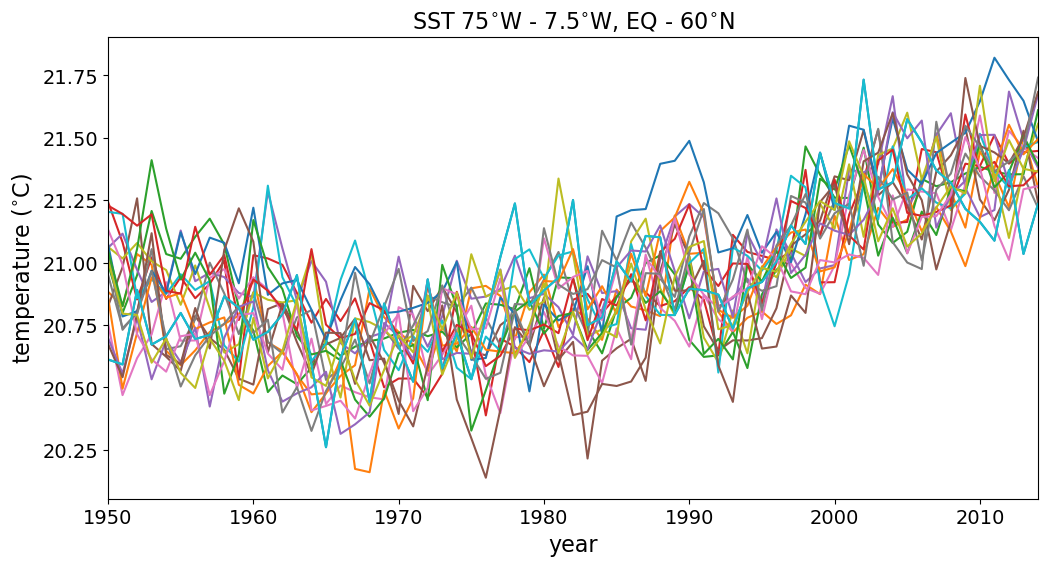

In [3]:
# Plot the surface timeseries (a.k.a. AMV):

# You can specify the size of the figure here:
fig = plt.figure(figsize=(12,6))

plt.plot(years,profile[:,:,0].T)

plt.xlim([1950,2014])
plt.gca().tick_params(axis='both',labelsize=14)
plt.xlabel('year',fontsize=16)
plt.ylabel('temperature ($^{\circ}$C)',fontsize=16)

plt.title(('SST 75$^{\circ}$W - 7.5$^{\circ}$W, EQ - 60$^{\circ}$N'),fontsize=16)

# Uncomment this line to save the plot in a directory called figures (you have to make the figures directory manually):
#fig.savefig(('figures/amv_timeseries_all.png'),\
#        dpi=100,bbox_inches='tight', pad_inches=0.1)

# The figure which has just generated contains a timeseries for each ensemble member but the trend hasn't been removed.

Text(0.5, 1.0, 'SST 75$^{\\circ}$W - 7.5$^{\\circ}$W, EQ - 60$^{\\circ}$N')

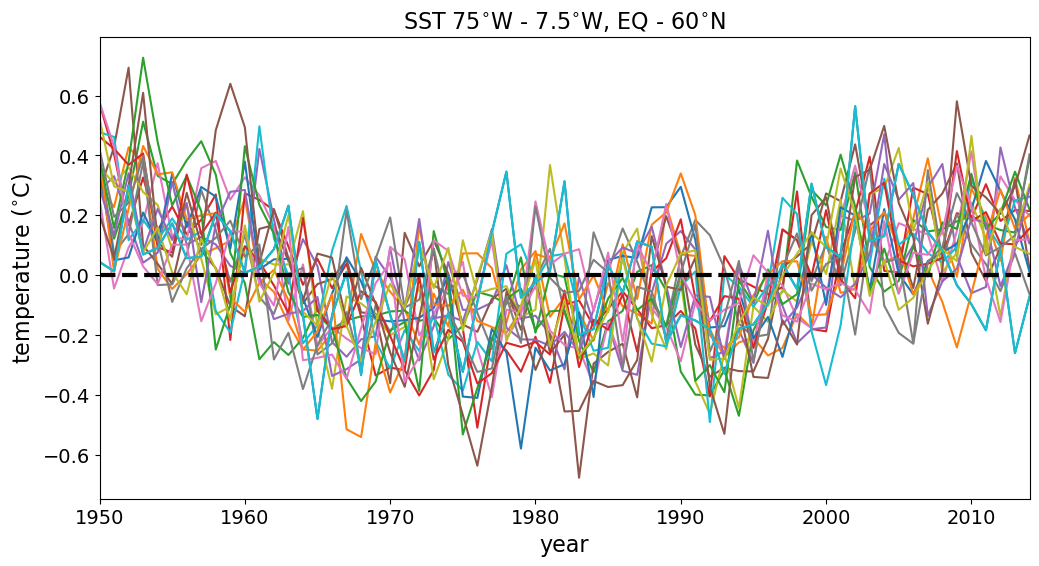

In [4]:
# Plot the surface timeseries (a.k.a. AMV index) with the trend removed:

# You can specify the size of the figure here:
fig = plt.figure(figsize=(12,6))

amv_detrended = np.zeros((nf,ny),'float')
for ff in range(0,nf):
    p = np.polyfit(years,profile[ff,:,0],1)
    amv_detrended[ff,:] = profile[ff,:,0] - p[0]*years - p[1]

plt.plot(years,amv_detrended.T)

# Put a horizonal line at y=0:
plt.axhline(y=0,color='k',linestyle='--',linewidth=3)

plt.xlim([1950,2014])
plt.gca().tick_params(axis='both',labelsize=14)
plt.xlabel('year',fontsize=16)
plt.ylabel('temperature ($^{\circ}$C)',fontsize=16)

plt.title(('SST 75$^{\circ}$W - 7.5$^{\circ}$W, EQ - 60$^{\circ}$N'),fontsize=16)

# Uncomment this line to save the plot in a directory called figures (you have to make the figures directory manually):
#fig.savefig(('figures/amv_timeseries_all_detrended.png'),\
#        dpi=100,bbox_inches='tight', pad_inches=0.1)

Text(0.5, 1.0, 'SST 75$^{\\circ}$W - 7.5$^{\\circ}$W, EQ - 60$^{\\circ}$N')

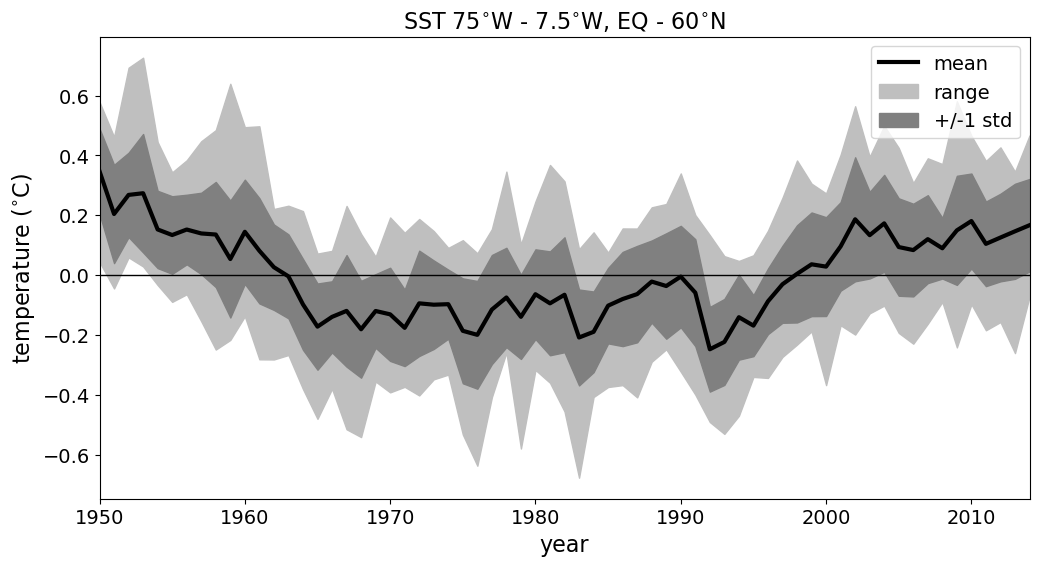

In [5]:
# Plot the surface timeseries (a.k.a. AMV index) with the trend removed, as mean, standard deivation and range:

# You can specify the size of the figure here:
fig = plt.figure(figsize=(12,6))

amv_detrended = np.zeros((nf,ny),'float')
for ff in range(0,nf):
    p = np.polyfit(years,profile[ff,:,0],1)
    amv_detrended[ff,:] = profile[ff,:,0] - p[0]*years - p[1]

# Ensemble mean:
plt.plot(years,np.mean(amv_detrended,axis=0),color='k',linewidth=3,label='mean')
# Ensemble range:
plt.fill_between(years,np.min(amv_detrended,axis=0),np.max(amv_detrended,axis=0),color='0.75',label='range')
# +/- one standard deviation:
plt.fill_between(years,np.mean(amv_detrended,axis=0)-np.std(amv_detrended,axis=0),np.mean(amv_detrended,axis=0)+np.std(amv_detrended,axis=0),color='0.5',label='+/-1 std')

# Put a horizonal line at y=0:
plt.axhline(y=0,color='k',linestyle='-',linewidth=1)

plt.xlim([1950,2014])
plt.gca().tick_params(axis='both',labelsize=14)
plt.xlabel('year',fontsize=16)
plt.ylabel('temperature ($^{\circ}$C)',fontsize=16)

plt.legend(fontsize=14)

plt.title(('SST 75$^{\circ}$W - 7.5$^{\circ}$W, EQ - 60$^{\circ}$N'),fontsize=16)

# Uncomment this line to save the plot in a directory called figures (you have to make the figures directory manually):
#fig.savefig(('figures/amv_timeseries_all_detrended_range.png'),\
#        dpi=100,bbox_inches='tight', pad_inches=0.1)

Text(0.5, 1.0, 'temperature profile 75$^{\\circ}$W - 7.5$^{\\circ}$W, EQ - 60$^{\\circ}$N\nensemble member 28')

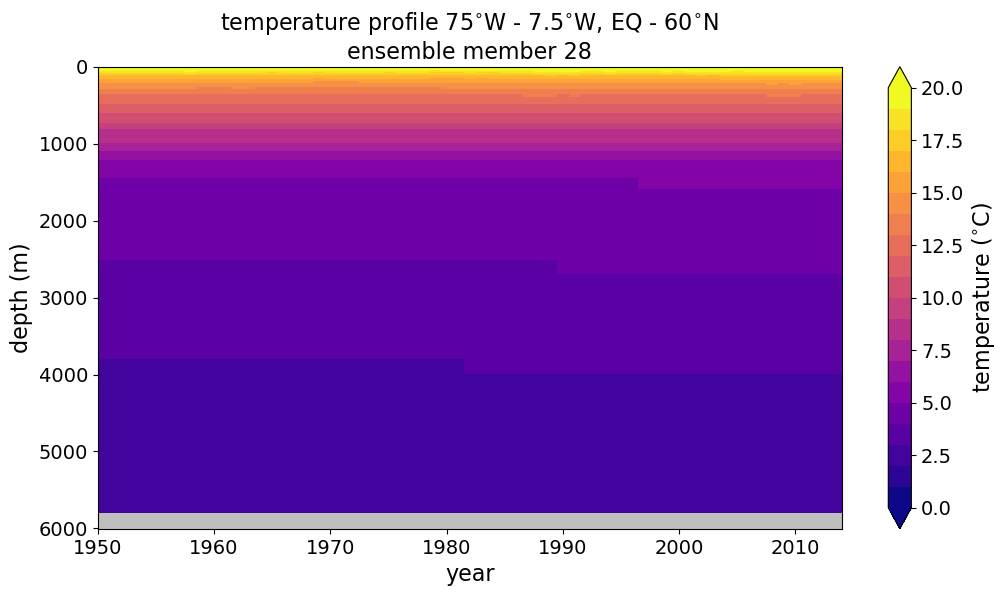

In [6]:
# Plot the profile for one ensemble member:
ensnum = 10

# You can specify the size of the figure here:
fig = plt.figure(figsize=(12,6))
# This specifies the colormap used, there are several options in matplotlib
# and the CANARI enviroment also has cmasher and cmocean installed for more options.
cmap = plt.get_cmap('plasma',20)

plt.pcolormesh(years,depth,profile[ensnum,:,:].T,cmap=cmap,shading='nearest',vmin=0,vmax=20)
# shading='nearest' takes years and depth as the centre of the data points, otherwise it will ignore the last time and depth
plt.gca().set_facecolor('0.75')  # This sets the color of the missing values, decimal numbers between 0 and 1 go from black to white

cb = plt.colorbar(extend='both')
cb.ax.tick_params(labelsize=14)
cb.set_label('temperature ($^{\circ}$C)',size=16)

plt.xlim([1950,2014])
plt.gca().tick_params(axis='both',labelsize=14)
plt.xlabel('year',fontsize=16)
plt.ylabel('depth (m)',fontsize=16)
# Invert the y-axis:
plt.gca().invert_yaxis()

plt.title(('temperature profile 75$^{\circ}$W - 7.5$^{\circ}$W, EQ - 60$^{\circ}$N\nensemble member ' + str(ensmem[ensnum])),fontsize=16)

# Uncomment this line to save the plot in a directory called figures (you have to make the figures directory manually):
#fig.savefig(('figures/amv_profile_' + str(ensmem[ensnum])) + '.png'),\
#        dpi=100,bbox_inches='tight', pad_inches=0.1)

Text(0.5, 1.0, 'temperature profile 75$^{\\circ}$W - 7.5$^{\\circ}$W, EQ - 60$^{\\circ}$N\nensemble mean upper 500 m')

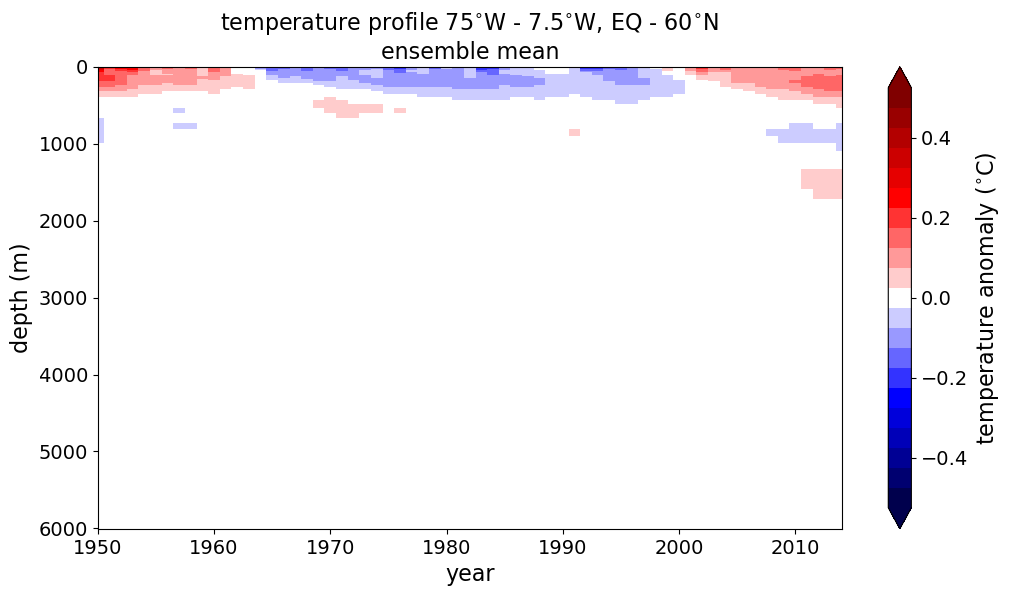

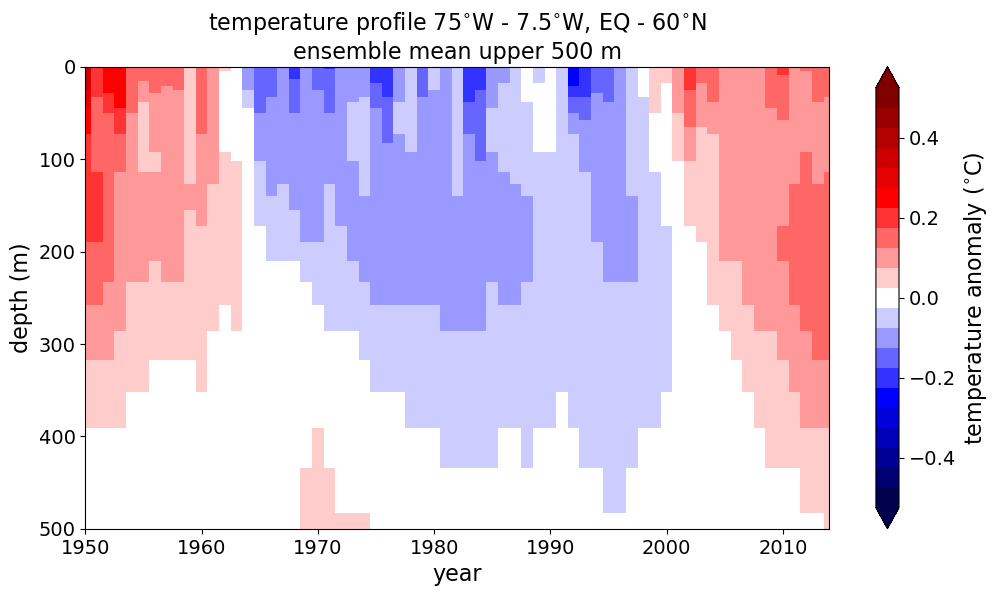

In [7]:
# repeat the first plot but as ensemble mean with trend removed:

# Compute anomalies w.r.t. the full time period:
profile_detrended = np.zeros((nf,ny,nk),'float')
# Remove trend:
for ff in range(0,nf):
    for kk in range(0,nk):
        p = np.polyfit(years,profile[ff,:,kk],1)
        profile_detrended[ff,:,kk] = profile[ff,:,kk] - p[0]*years - p[1]
profile_emean      = np.mean(profile_detrended,axis=0)
profile_emean_anom = profile_emean - np.tile(np.mean(profile_emean,axis=0),(ny,1))

# You can specify the size of the figure here:
fig = plt.figure(figsize=(12,6))
# This specifies the colormap used, there are several options in matplotlib
# and the CANARI enviroment also has cmasher and cmocean installed for more options.
cmap = plt.get_cmap('seismic',21)

plt.pcolormesh(years,depth,profile_emean_anom.T,cmap=cmap,shading='nearest',vmin=-1.05*0.5,vmax=1.05*0.5)
# shading='nearest' takes years and depth as the centre of the data points, otherwise it will ignore the last time and depth
plt.gca().set_facecolor('0.75')

cb = plt.colorbar(extend='both')
cb.ax.tick_params(labelsize=14)
cb.set_label('temperature anomaly ($^{\circ}$C)',size=16)

plt.xlim([1950,2014])
plt.gca().tick_params(axis='both',labelsize=14)
plt.xlabel('year',fontsize=16)
plt.ylabel('depth (m)',fontsize=16)
# Invert the y-axis:
plt.gca().invert_yaxis()

plt.title(('temperature profile 75$^{\circ}$W - 7.5$^{\circ}$W, EQ - 60$^{\circ}$N\nensemble mean'),fontsize=16)

# Uncomment this line to save the plot in a directory called figures (you have to make the figures directory manually):
#fig.savefig(('figures/amv_profile_mean_anomaly.png'),\
#        dpi=100,bbox_inches='tight', pad_inches=0.1)

# Zoom in to upper 500 m:

# You can specify the size of the figure here:
fig = plt.figure(figsize=(12,6))
# This specifies the colormap used, there are several options in matplotlib
# and the CANARI enviroment also has cmasher and cmocean installed for more options.
cmap = plt.get_cmap('seismic',21)

plt.pcolormesh(years,depth,profile_emean_anom.T,cmap=cmap,shading='nearest',vmin=-1.05*0.5,vmax=1.05*0.5)
# shading='nearest' takes years and depth as the centre of the data points, otherwise it will ignore the last time and depth
plt.gca().set_facecolor('0.75')

cb = plt.colorbar(extend='both')
cb.ax.tick_params(labelsize=14)
cb.set_label('temperature anomaly ($^{\circ}$C)',size=16)

plt.xlim([1950,2014])
plt.ylim([0,500])
plt.gca().tick_params(axis='both',labelsize=14)
plt.xlabel('year',fontsize=16)
plt.ylabel('depth (m)',fontsize=16)
# Invert the y-axis:
plt.gca().invert_yaxis()

plt.title(('temperature profile 75$^{\circ}$W - 7.5$^{\circ}$W, EQ - 60$^{\circ}$N\nensemble mean upper 500 m'),fontsize=16)

# Uncomment this line to save the plot in a directory called figures (you have to make the figures directory manually):
#fig.savefig(('figures/amv_profile_mean_anomaly_upper500m.png'),\
#        dpi=100,bbox_inches='tight', pad_inches=0.1)